# Face mask detection using transfer learning

This notebook focuses on using a pre-trained MobileNet V1 model and using transfer learning on the Kaggle Mask dataset to perform face mask detection on a number of portraits. The importance of transfer learning is strssed as it helps save engineering time by avoiding the need to start from scratch.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

## Create the dataset

First, download the Kaggle Mask dataset containing hundreds of images of people with and without masks.

In [9]:
import gdown
id = '1wbYQjju-YdawnAvvnNJLFor3m0WgsVnd'
url = f'https://drive.google.com/uc?id={id}'
# '.nosync' added to prevent large file from syncing with icloud.
# ugly but it appears to be the only way possible for now.
dest = 'edx_transfer_learningv3.zip.nosync'
gdown.download(url, dest, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1wbYQjju-YdawnAvvnNJLFor3m0WgsVnd
To: /Users/lukehutton/Library/Mobile Documents/com~apple~CloudDocs/University/Harvard Tiny ML/applications/edx_transfer_learningv3.zip.nosync

0.00B [00:00, ?B/s]
524kB [00:00, 3.95MB/s]
1.57MB [00:00, 5.67MB/s]
2.62MB [00:00, 6.15MB/s]
3.67MB [00:00, 6.38MB/s]
4.72MB [00:00, 6.51MB/s]
5.77MB [00:00, 6.61MB/s]
6.82MB [00:01, 6.68MB/s]
7.86MB [00:01, 6.72MB/s]
8.91MB [00:01, 6.66MB/s]
9.96MB [00:01, 6.75MB/s]
11.0MB [00:01, 6.78MB/s]
12.1MB [00:01, 6.77MB/s]
13.1MB [00:02, 6.67MB/s]
14.2MB [00:02, 6.78MB/s]
15.2MB [00:02, 6.72MB/s]
16.3MB [00:02, 6.72MB/s]
17.3MB [00:02, 6.75MB/s]
18.4MB [00:02, 6.73MB/s]
19.4MB [00:02, 6.77MB/s]
20.4MB [00:03, 6.81MB/s]
21.5MB [00:03, 6.82MB/s]
22.5MB [00:03, 6.81MB/s]
23.6MB [00:03, 6.79MB/s]
24.6MB [00:03, 6.78MB/s]
25.7MB [00:03, 6.76MB/s]
26.7MB [00:04, 6.75MB/s]
27.8MB [00:04, 6.81MB/s]
28.8MB [00:04, 6.80MB/s]
29.9MB [00:04, 6.81MB/s]
30.9MB [00:04, 6.80MB/s]
32

304MB [00:46, 6.81MB/s]
305MB [00:46, 6.77MB/s]
306MB [00:46, 6.66MB/s]
307MB [00:46, 6.85MB/s]
308MB [00:46, 6.83MB/s]
309MB [00:46, 6.84MB/s]
310MB [00:46, 6.78MB/s]
311MB [00:47, 6.79MB/s]
312MB [00:47, 6.79MB/s]
313MB [00:47, 6.83MB/s]
315MB [00:47, 6.71MB/s]
316MB [00:47, 6.84MB/s]
317MB [00:47, 6.82MB/s]
318MB [00:48, 6.84MB/s]
319MB [00:48, 6.84MB/s]
320MB [00:48, 6.82MB/s]
321MB [00:48, 6.82MB/s]
322MB [00:48, 5.37MB/s]
323MB [00:48, 5.67MB/s]
324MB [00:49, 6.01MB/s]
325MB [00:49, 6.24MB/s]
326MB [00:49, 6.41MB/s]
327MB [00:49, 6.49MB/s]
328MB [00:49, 6.55MB/s]
329MB [00:49, 6.65MB/s]
330MB [00:50, 6.61MB/s]
331MB [00:50, 6.54MB/s]
332MB [00:50, 6.73MB/s]
333MB [00:50, 6.75MB/s]
334MB [00:50, 6.77MB/s]
336MB [00:50, 6.81MB/s]
337MB [00:50, 6.62MB/s]
338MB [00:51, 6.86MB/s]
339MB [00:51, 6.84MB/s]
340MB [00:51, 6.67MB/s]
341MB [00:51, 6.85MB/s]
342MB [00:51, 6.84MB/s]
343MB [00:51, 6.85MB/s]
344MB [00:52, 6.84MB/s]
345MB [00:52, 6.84MB/s]
346MB [00:52, 6.80MB/s]
347MB [00:52, 6.

622MB [01:34, 6.81MB/s]
623MB [01:34, 6.81MB/s]
624MB [01:34, 6.79MB/s]
625MB [01:34, 6.82MB/s]
626MB [01:34, 6.80MB/s]
627MB [01:34, 6.79MB/s]
628MB [01:35, 6.79MB/s]
629MB [01:35, 6.79MB/s]
630MB [01:35, 6.79MB/s]
631MB [01:35, 6.82MB/s]
632MB [01:35, 6.81MB/s]
633MB [01:35, 6.72MB/s]
634MB [01:36, 6.75MB/s]
635MB [01:36, 5.37MB/s]
636MB [01:36, 5.58MB/s]
637MB [01:36, 5.89MB/s]
639MB [01:36, 6.14MB/s]
640MB [01:36, 6.30MB/s]
641MB [01:37, 6.45MB/s]
642MB [01:37, 6.55MB/s]
643MB [01:37, 6.62MB/s]
644MB [01:37, 6.70MB/s]
645MB [01:37, 6.73MB/s]
646MB [01:37, 6.74MB/s]
647MB [01:38, 6.77MB/s]
648MB [01:38, 6.77MB/s]
649MB [01:38, 6.78MB/s]
650MB [01:38, 6.80MB/s]
651MB [01:38, 6.77MB/s]
652MB [01:38, 6.82MB/s]
653MB [01:38, 6.80MB/s]
654MB [01:39, 6.79MB/s]
655MB [01:39, 6.78MB/s]
656MB [01:39, 6.77MB/s]
657MB [01:39, 6.79MB/s]
658MB [01:39, 6.79MB/s]
660MB [01:39, 6.79MB/s]
661MB [01:40, 6.79MB/s]
662MB [01:40, 6.80MB/s]
663MB [01:40, 6.80MB/s]
664MB [01:40, 6.82MB/s]
665MB [01:40, 6.

939MB [02:22, 6.80MB/s]
940MB [02:22, 6.81MB/s]
941MB [02:22, 6.73MB/s]
942MB [02:22, 6.77MB/s]
943MB [02:22, 6.77MB/s]
944MB [02:23, 6.77MB/s]
945MB [02:23, 6.79MB/s]
946MB [02:23, 6.81MB/s]
947MB [02:23, 6.79MB/s]
948MB [02:23, 6.82MB/s]
949MB [02:23, 6.80MB/s]
951MB [02:24, 6.81MB/s]
952MB [02:24, 6.81MB/s]
953MB [02:24, 6.82MB/s]
954MB [02:24, 6.79MB/s]
955MB [02:24, 6.80MB/s]
956MB [02:24, 6.79MB/s]
957MB [02:24, 6.80MB/s]
958MB [02:25, 6.80MB/s]
959MB [02:25, 6.81MB/s]
960MB [02:25, 6.81MB/s]
961MB [02:25, 6.78MB/s]
962MB [02:25, 6.81MB/s]
963MB [02:25, 6.81MB/s]
964MB [02:26, 6.81MB/s]
965MB [02:26, 6.83MB/s]
966MB [02:26, 6.81MB/s]
967MB [02:26, 6.81MB/s]
968MB [02:26, 6.81MB/s]
969MB [02:26, 5.34MB/s]
970MB [02:27, 5.68MB/s]
972MB [02:27, 5.97MB/s]
973MB [02:27, 6.20MB/s]
974MB [02:27, 6.38MB/s]
975MB [02:27, 6.41MB/s]
976MB [02:27, 6.51MB/s]
977MB [02:28, 6.62MB/s]
978MB [02:28, 6.67MB/s]
979MB [02:28, 6.72MB/s]
980MB [02:28, 6.75MB/s]
981MB [02:28, 6.77MB/s]
982MB [02:28, 6.

1.25GB [03:09, 5.15MB/s]
1.25GB [03:09, 5.57MB/s]
1.25GB [03:09, 5.88MB/s]
1.25GB [03:09, 6.15MB/s]
1.25GB [03:09, 6.34MB/s]
1.25GB [03:09, 6.45MB/s]
1.25GB [03:10, 6.46MB/s]
1.25GB [03:10, 6.66MB/s]
1.26GB [03:10, 6.69MB/s]
1.26GB [03:10, 6.74MB/s]
1.26GB [03:10, 6.77MB/s]
1.26GB [03:10, 6.77MB/s]
1.26GB [03:10, 6.80MB/s]
1.26GB [03:11, 6.80MB/s]
1.26GB [03:11, 6.64MB/s]
1.26GB [03:11, 6.87MB/s]
1.26GB [03:11, 6.85MB/s]
1.26GB [03:11, 6.69MB/s]
1.27GB [03:11, 6.73MB/s]
1.27GB [03:12, 3.24MB/s]
1.27GB [03:12, 3.84MB/s]
1.27GB [03:12, 4.39MB/s]
1.27GB [03:13, 4.89MB/s]
1.27GB [03:13, 5.38MB/s]
1.27GB [03:13, 5.69MB/s]
1.27GB [03:13, 5.95MB/s]
1.27GB [03:13, 6.21MB/s]
1.27GB [03:13, 6.35MB/s]
1.28GB [03:13, 6.50MB/s]
1.28GB [03:14, 6.59MB/s]
1.28GB [03:14, 6.66MB/s]
1.28GB [03:14, 6.53MB/s]
1.28GB [03:14, 6.80MB/s]
1.28GB [03:14, 6.77MB/s]
1.28GB [03:14, 6.79MB/s]
1.28GB [03:14, 6.80MB/s]
1.28GB [03:15, 6.83MB/s]
1.28GB [03:15, 6.83MB/s]
1.29GB [03:15, 6.81MB/s]
1.29GB [03:15, 6.65MB/s]


1.55GB [03:56, 4.15MB/s]
1.55GB [03:56, 4.76MB/s]
1.55GB [03:56, 5.25MB/s]
1.55GB [03:56, 5.63MB/s]
1.55GB [03:56, 5.87MB/s]
1.55GB [03:56, 6.13MB/s]
1.55GB [03:56, 6.33MB/s]
1.56GB [03:57, 6.49MB/s]
1.56GB [03:57, 6.48MB/s]
1.56GB [03:57, 6.61MB/s]
1.56GB [03:57, 6.67MB/s]
1.56GB [03:57, 6.69MB/s]
1.56GB [03:57, 6.74MB/s]
1.56GB [03:58, 6.72MB/s]
1.56GB [03:58, 6.77MB/s]
1.56GB [03:58, 6.79MB/s]
1.56GB [03:58, 6.80MB/s]
1.57GB [03:58, 6.78MB/s]
1.57GB [03:58, 6.80MB/s]
1.57GB [03:58, 6.55MB/s]
1.57GB [03:59, 6.87MB/s]
1.57GB [03:59, 6.85MB/s]
1.57GB [03:59, 6.83MB/s]
1.57GB [03:59, 6.82MB/s]
1.57GB [03:59, 6.80MB/s]
1.57GB [03:59, 6.80MB/s]
1.57GB [03:59, 6.83MB/s]
1.58GB [04:00, 6.80MB/s]
1.58GB [04:00, 6.82MB/s]
1.58GB [04:00, 6.81MB/s]
1.58GB [04:00, 6.82MB/s]
1.58GB [04:00, 6.65MB/s]
1.58GB [04:00, 6.85MB/s]
1.58GB [04:01, 6.82MB/s]
1.58GB [04:01, 6.84MB/s]
1.58GB [04:01, 6.82MB/s]
1.59GB [04:01, 6.83MB/s]
1.59GB [04:01, 6.80MB/s]
1.59GB [04:01, 6.82MB/s]
1.59GB [04:02, 6.55MB/s]


1.85GB [04:45, 1.39MB/s]
1.85GB [04:45, 1.51MB/s]
1.85GB [04:45, 1.75MB/s]
1.85GB [04:45, 2.08MB/s]
1.85GB [04:45, 2.44MB/s]
1.85GB [04:46, 2.87MB/s]
1.85GB [04:46, 3.73MB/s]
1.85GB [04:46, 4.50MB/s]
1.85GB [04:46, 5.22MB/s]
1.85GB [04:46, 5.68MB/s]
1.85GB [04:46, 6.00MB/s]
1.86GB [04:47, 6.27MB/s]
1.86GB [04:47, 6.41MB/s]
1.86GB [04:47, 6.51MB/s]
1.86GB [04:47, 6.62MB/s]
1.86GB [04:47, 6.43MB/s]
1.86GB [04:47, 6.64MB/s]
1.86GB [04:47, 6.67MB/s]
1.86GB [04:48, 6.71MB/s]
1.86GB [04:48, 6.74MB/s]
1.86GB [04:48, 6.76MB/s]
1.87GB [04:48, 6.79MB/s]
1.87GB [04:48, 6.80MB/s]
1.87GB [04:48, 5.66MB/s]
1.87GB [04:49, 5.31MB/s]
1.87GB [04:49, 5.68MB/s]
1.87GB [04:49, 5.95MB/s]
1.87GB [04:49, 6.06MB/s]
1.87GB [04:49, 6.26MB/s]
1.87GB [04:50, 6.41MB/s]
1.88GB [04:50, 6.54MB/s]
1.88GB [04:50, 6.43MB/s]
1.88GB [04:50, 6.67MB/s]
1.88GB [04:50, 6.73MB/s]
1.88GB [04:50, 6.50MB/s]
1.88GB [04:50, 6.84MB/s]
1.88GB [04:51, 6.85MB/s]
1.88GB [04:51, 6.84MB/s]
1.88GB [04:51, 6.79MB/s]
1.88GB [04:51, 6.65MB/s]


'edx_transfer_learningv3.zip.nosync'

In [10]:
from zipfile import ZipFile

unzip_dest = 'edx_transfer_learningv3.nosync'
with ZipFile(dest, 'r') as ref:
    ref.extractall(unzip_dest)

In [18]:
import os
path = os.path.join(unzip_dest, 'edx_transfer_learningv3/edx_transfer_learning/')

train_dir = os.path.join(path,'train')
validation_dir = os.path.join(path, 'validation')

batch_size = 32
image_size = (96, 96)
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=image_size)
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  image_size=image_size)

Found 602 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


The datasets have been built. We can sample the first nine images and labels from the training set.

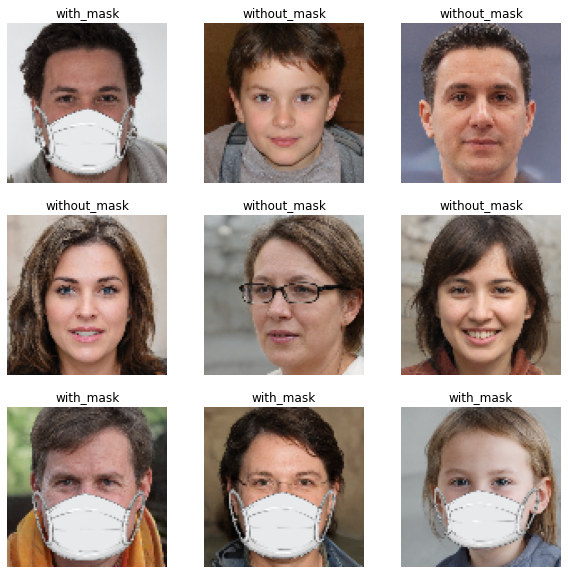

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis('off')

The test set we are using doesn't have a test dataset. Therefore we will split up the validation dataset and move 20% of it to a new test dataset.

In [20]:
validation_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(validation_batches // 5)
validation_dataset = validation_dataset.skip(validation_batches // 5)

print(f'Validation batches: {tf.data.experimental.cardinality(validation_dataset)}')
print(f'Test batches: {tf.data.experimental.cardinality(test_dataset)}')

Validation batches: 26
Test batches: 6


Now we configure the dataset for performance. Buffered prefetching is used to help avoid the I/O bottleneck.

In [21]:
for ds in [train_dataset, validation_dataset, test_dataset]:
    ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Since we don't have a large dataset of images, we can use data augmentation to artificially introduce sample diversity by applying random transformations.

In [23]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

These artificially created layers are only active during training. They are inactive during inference using either `model.evaluate` or `model.predict`. We can see this augmentation happening by applying it to a subset of images in the dataset.

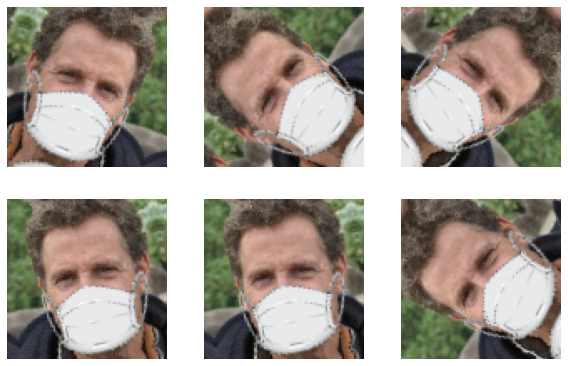

In [25]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

We are using a pretrained model so need to match the training data to what was already used. The model expects pixel values in the range [-1, 1], but our current data is in the format [0, 255]. We preprocess the input using a method provided by the pre-trained model.

In [26]:
preprocess_input = tf.keras.applications.mobilenet.preprocess_input

## Build the model

We start by recreating the base MobileNet V1 model. This is pretrained on the ImageNet dataset consisting of 1.4M images and 1000 classes.

We want to freeze all but the last layer of the model (the layer before the classification layers). Fortunately the Keras api allows us to download the MobileNet V1 model without the final layers. This is done using `include_top=False`.

In [29]:
image_shape = image_size + (3,)
base_model = tf.keras.applications.MobileNet(input_shape=image_shape,
                                            include_top=False,
                                            weights='imagenet')

17227776/17225924 [==============================] - 3s 0us/step


## Freeze the convolutional layers

We need to freeze the layers of the model before compiling and training with transfer learning. This can be done by setting `layer.trainable = False`.

In [32]:
base_model.trainable = False
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 48, 48, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 48, 48, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 48, 48, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 48, 48, 32) 

## Add classification layers

We need to add the remainder of the model which will be left trainable for our usecase. First, we can use a `GlobalAveragePooling2D` layer to convert the 5x5 spatial features into a single 1024-element feature vector per image. Then apply a dense layer to convert the feature vector into a single prediction per image. No activation function is needed because this prediction is treated as a _logit_ aka a raw prediction value. Positive numbers predict a class 1 and negative numbers predict a class 0.

In [33]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

inputs = tf.keras.Input(shape=image_shape)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

## Compile the model

Compile the model before training it. We use a binary cross entropy loss since there are two classes.

In [35]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 96, 96, 3)         0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 96, 96, 3)         0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 96, 96, 3)         0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 3, 3, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0     

## Train and evaluate the model

First determine the initial accuracy of the model.

In [36]:
initial_loss, initial_accuracy = model.evaluate(validation_dataset)
print(f'Initial loss {initial_loss:.2f}, Initial accuracy {initial_accuracy:.2f}')

26/26 [==============================] - 16s 378ms/step - loss: 1.4076 - accuracy: 0.2574
Initial loss 1.41, Initial accuracy 0.26


Now train the final layers of the model to classify people with and without masks. This doesn't take too long because we are only training the final layer. This is the benefit of using transfer learning.

In [37]:
epochs = 15
history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=validation_dataset)

Epoch 1/15
19/19 [==============================] - 26s 1s/step - loss: 1.3108 - accuracy: 0.4136 - val_loss: 1.0199 - val_accuracy: 0.3973
Epoch 2/15
19/19 [==============================] - 22s 1s/step - loss: 1.0661 - accuracy: 0.5017 - val_loss: 0.7483 - val_accuracy: 0.5408
Epoch 3/15
19/19 [==============================] - 24s 1s/step - loss: 0.8290 - accuracy: 0.5698 - val_loss: 0.5671 - val_accuracy: 0.6634
Epoch 4/15
19/19 [==============================] - 21s 1s/step - loss: 0.6909 - accuracy: 0.6246 - val_loss: 0.4406 - val_accuracy: 0.7611
Epoch 5/15
19/19 [==============================] - 29s 1s/step - loss: 0.5410 - accuracy: 0.6910 - val_loss: 0.3492 - val_accuracy: 0.8342
Epoch 6/15
19/19 [==============================] - 22s 1s/step - loss: 0.4417 - accuracy: 0.7625 - val_loss: 0.2779 - val_accuracy: 0.8899
Epoch 7/15
19/19 [==============================] - 22s 1s/step - loss: 0.3201 - accuracy: 0.8090 - val_loss: 0.2239 - val_accuracy: 0.9245
Epoch 8/15
19/19 [==

Lets have a look at how the accuracy increases over time and how the loss decreases over time.

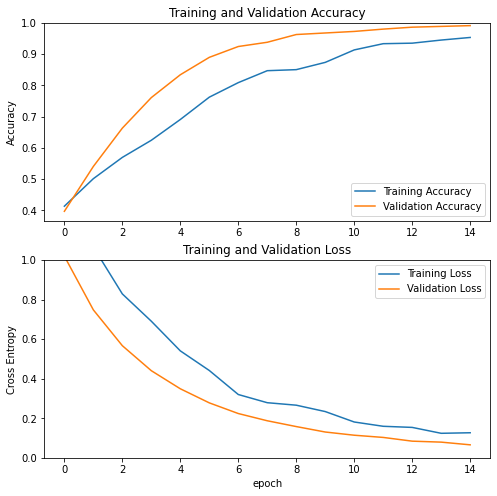

In [40]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Evaluate the final model. If the accuracy is 1.0 we know that the model got every prediction correct.

In [38]:
loss, accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')

6/6 [==============================] - 6s 466ms/step - loss: 0.0614 - accuracy: 1.0000
Test accuracy: 1.0


Lets view some of the results from images in our test dataset.

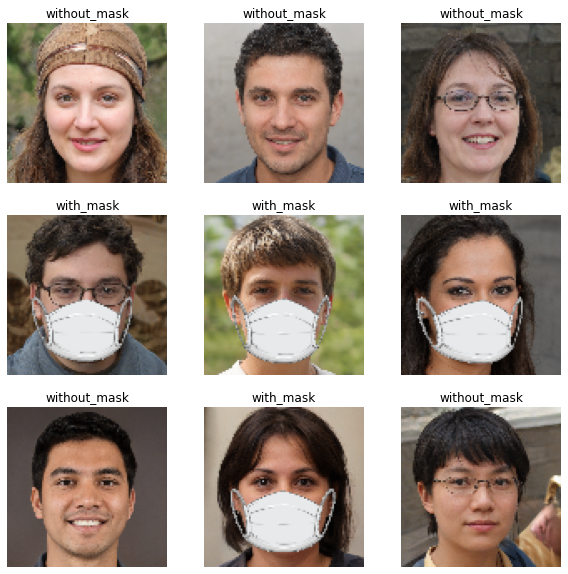

In [41]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(train_dataset.class_names[predictions[i]])
    plt.axis('off')